In [1]:
import cv2
import numpy as np
import random
import gzip
import pickle
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
import tensorflow.keras as keras
import matplotlib.pyplot as plt

print('Dataset importing..')

test_data_num = 300 #define number of test data number

X_train_bef = []
X_test_bef = []

fire_total = []
none_total = []
fire_image_total = []
none_image_total = []

#vector style data (7500,)
X_train = []
X_test = []
Y_train = []
Y_test = []

#image array style data (50, 50, 3)
Y_train_image = []
X_train_image = []
Y_test_image = []
X_test_image = []

#dataset import
with gzip.open('dataset_fire.pickle','rb') as f:
    dataset_fire = pickle.load(f)

with gzip.open('dataset_none.pickle','rb') as f:
    dataset_none = pickle.load(f)

for key in dataset_fire:
    fire_image_total.append(dataset_fire[key])
    fire_total.append([dataset_fire[key][0].reshape(-1), dataset_fire[key][1]])

for key in dataset_none:
    none_image_total.append(dataset_none[key])
    none_total.append([dataset_none[key][0].reshape(-1), dataset_none[key][1]])

random.shuffle(fire_total)
random.shuffle(none_total)

random.shuffle(fire_image_total)
random.shuffle(none_image_total)

X_train_fire = fire_total[int(test_data_num/2):]
X_test_fire = fire_total[:int(test_data_num/2)]
X_train_none = none_total[int(test_data_num/2):]
X_test_none = none_total[:int(test_data_num/2)]

X_train_image_fire = fire_image_total[int(test_data_num/2):]
X_test_image_fire = fire_image_total[:int(test_data_num/2)]
X_train_image_none = none_image_total[int(test_data_num/2):]
X_test_image_none = none_image_total[:int(test_data_num/2)]

X_train_bef = X_train_fire + X_train_none
X_test_bef = X_test_fire + X_test_none
X_train_image_bef = X_train_image_fire + X_train_image_none
X_test_image_bef = X_test_image_fire + X_test_image_none

random.shuffle(X_train_bef)
random.shuffle(X_test_bef)
random.shuffle(X_train_image_bef)
random.shuffle(X_test_image_bef)

for i in range(len(X_train_bef)):
    Y_train.append(X_train_bef[i][1]) #label
    X_train.append(X_train_bef[i][0]) #image (7500,)
    Y_train_image.append(X_train_image_bef[i][1]) #label
    X_train_image.append(X_train_image_bef[i][0]) #image (50, 50, 3)

for i in range(len(X_test_bef)):
    Y_test.append(X_test_bef[i][1]) #label
    X_test.append(X_test_bef[i][0]) #image (7500,)
    Y_test_image.append(X_test_image_bef[i][1]) #label
    X_test_image.append(X_test_image_bef[i][0]) #iamge (50, 50, 3)

#normalization
X_train = np.array(X_train)
X_train = X_train.astype('float32')
X_train /= 255

X_train_image = np.array(X_train_image)
X_train_image = X_train_image.astype('float32')
X_train_image /= 255

Y_train_image = np.array(Y_train_image)
Y_train_image = Y_train_image.astype('float32')

X_test = np.array(X_test)
X_test = X_test.astype('float32')
X_test /= 255

Y_test_image = np.array(Y_test_image)
Y_test_image = Y_test_image.astype('float32')

X_test_image = np.array(X_test_image)
X_test_image = X_test_image.astype('float32')
X_test_image /= 255

print('X_train_shape :', np.shape(X_train))
print('X_test_shape :', np.shape(X_test))
print('Y_train_shape :', np.shape(Y_train))
print('Y_test_shape :', np.shape(Y_test))
print('X_train_image_shape :', np.shape(X_train_image))
print('X_test_image_shape :', np.shape(X_test_image))
print('Y_train_image_shape :', np.shape(Y_train_image))
print('Y_test_image_shape :', np.shape(Y_test_image))

print('Dataset imported.')

Dataset importing..
X_train_shape : (1713, 7500)
X_test_shape : (300, 7500)
Y_train_shape : (1713,)
Y_test_shape : (300,)
X_train_image_shape : (1713, 50, 50, 3)
X_test_image_shape : (300, 50, 50, 3)
Y_train_image_shape : (1713,)
Y_test_image_shape : (300,)
Dataset imported.


In [48]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
import collections

smote = SMOTE(random_state=0)
# Apply SMOTE method on training data
X_train_SMOTE, Y_train_SMOTE = SMOTE(random_state=0).fit_resample(X_train, Y_train)

X_train_image_SMOTE, Y_train_image_SMOTE = SMOTE(random_state=0).fit_resample(X_train_image.reshape(X_train_image.shape[0], -1), Y_train_image)
X_train_image_SMOTE = X_train_image_SMOTE.reshape(X_train_image_SMOTE.shape[0],50,50,3)

# Apply ADASYN method on training data
X_train_ADASYN, Y_train_ADASYN = ADASYN(random_state=0).fit_resample(X_train, Y_train)

X_train_image_ADASYN, Y_train_image_ADASYN = ADASYN(random_state=0).fit_resample(X_train_image.reshape(X_train_image.shape[0], -1), Y_train_image)
X_train_image_ADASYN = X_train_image_ADASYN.reshape(X_train_image_ADASYN.shape[0],50,50,3)

#0 - None fire image, 1 - fire image
print("Origin data :",collections.Counter(Y_train))
print("After SMOTE :", collections.Counter(Y_train_SMOTE))
print("After ADASYN :", collections.Counter(Y_train_ADASYN))

Origin data : Counter({0: 1463, 1: 250})
After SMOTE : Counter({0: 1463, 1: 1463})
After ADASYN : Counter({0: 1463, 1: 1461})


In [49]:
#SVM training
C_values = [1, 5]
gammas = [0.00002, 0.0002, 0.001, 0.002, 0.003, 0.2, 0.02]
for C_value in C_values:
    for gamma in gammas:
        
        print("calculating..")
        print("[C = ", str(C_value),", gamma = ",str(gamma),"]", end='')
        
        #Imbalanced dataset
        clf=svm.SVC(kernel="rbf", C=C_value, gamma = gamma, max_iter=20000)
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        
        pred_count = 0
        for i in range(len(Y_pred)):
            if (Y_pred[i] == 0) and (Y_test[i] == 0):
                pred_count = pred_count + 1
            elif (Y_pred[i] == 1) and (Y_test[i] == 1):
                pred_count = pred_count + 1

            accuracy = pred_count / len(Y_pred)
            accuracy = round(accuracy, 5)
        print("  IMBALANCED_accuracy :", round(accuracy*100, 3), "[%], ", end='')
        
        #Applied SMOTE dataset
        clf_SMOTE=svm.SVC(kernel="rbf", C=C_value, gamma = gamma, max_iter=20000)
        clf_SMOTE.fit(X_train_SMOTE, Y_train_SMOTE)
        Y_pred = clf_SMOTE.predict(X_test)
        
        pred_count = 0
        for i in range(len(Y_pred)):
            if (Y_pred[i] == 0) and (Y_test[i] == 0):
                pred_count = pred_count + 1
            elif (Y_pred[i] == 1) and (Y_test[i] == 1):
                pred_count = pred_count + 1

            accuracy = pred_count / len(Y_pred)
            accuracy = round(accuracy, 5)
        print("SMOTE_accuracy :", round(accuracy*100, 3), "[%], ", end='')
        
        #Applied ADASYN dataset
        clf_ADASYN=svm.SVC(kernel="rbf", C=C_value, gamma = gamma, max_iter=20000)
        clf_ADASYN.fit(X_train_ADASYN, Y_train_ADASYN)
        Y_pred = clf_SMOTE.predict(X_test)
        
        pred_count = 0
        for i in range(len(Y_pred)):
            if (Y_pred[i] == 0) and (Y_test[i] == 0):
                pred_count = pred_count + 1
            elif (Y_pred[i] == 1) and (Y_test[i] == 1):
                pred_count = pred_count + 1

            accuracy = pred_count / len(Y_pred)
            accuracy = round(accuracy, 5)
        print("ADASYN_accuracy :", round(accuracy*100, 3), "[%]")

#best performance : c=5, gamma=0.001~0.002

calculating..
[C =  1 , gamma =  2e-05 ]  IMBALANCED_accuracy : 75.667 [%], SMOTE_accuracy : 86.667 [%], ADASYN_accuracy : 86.667 [%]
calculating..
[C =  1 , gamma =  0.0002 ]  IMBALANCED_accuracy : 81.667 [%], SMOTE_accuracy : 88.333 [%], ADASYN_accuracy : 88.333 [%]
calculating..
[C =  1 , gamma =  0.001 ]  IMBALANCED_accuracy : 82.0 [%], SMOTE_accuracy : 89.333 [%], ADASYN_accuracy : 89.333 [%]
calculating..
[C =  1 , gamma =  0.002 ]  IMBALANCED_accuracy : 82.333 [%], SMOTE_accuracy : 86.667 [%], ADASYN_accuracy : 86.667 [%]
calculating..
[C =  1 , gamma =  0.003 ]  IMBALANCED_accuracy : 81.333 [%], SMOTE_accuracy : 84.0 [%], ADASYN_accuracy : 84.0 [%]
calculating..
[C =  1 , gamma =  0.2 ]  IMBALANCED_accuracy : 52.0 [%], SMOTE_accuracy : 52.333 [%], ADASYN_accuracy : 52.333 [%]
calculating..
[C =  1 , gamma =  0.02 ]  IMBALANCED_accuracy : 52.333 [%], SMOTE_accuracy : 53.0 [%], ADASYN_accuracy : 53.0 [%]
calculating..
[C =  5 , gamma =  2e-05 ]  IMBALANCED_accuracy : 80.333 [%], 

In [50]:
#PCA + SVM Classification
components = [1, 2, 5, 10, 100]

for n_components in components:
    print('number of components : ', str(n_components), end='')
    
    #Imbalanced dataset
    pca = PCA(n_components=n_components)
    features_X_train = pca.fit_transform(X_train)
    features_X_test = pca.fit_transform(X_test)

    clf=svm.SVC(kernel="rbf", C=5, gamma = 0.002, max_iter=20000)
    clf.fit(features_X_train, Y_train)
    Y_pred = clf.predict(features_X_test)

    pred_count = 0
    for i in range(len(Y_pred)):
        if (Y_pred[i] == 0) and (Y_test[i] == 0):
            pred_count = pred_count + 1
        elif (Y_pred[i] == 1) and (Y_test[i] == 1):
            pred_count = pred_count + 1

    accuracy = pred_count / len(Y_pred)
    accuracy = round(accuracy, 5)
    print("  IMBALANCED_accuracy :", round(accuracy*100, 3), "[%], ", end='')

    #Applied SMOTE dataset
    pca_SMOTE = PCA(n_components=n_components)
    features_X_train_SMOTE = pca_SMOTE.fit_transform(X_train_SMOTE)
    features_X_test_SMOTE = pca_SMOTE.fit_transform(X_test)
    
    clf_SMOTE=svm.SVC(kernel="rbf", C=5, gamma = 0.002, max_iter=20000)
    clf_SMOTE.fit(X_train_SMOTE, Y_train_SMOTE)
    Y_pred = clf_SMOTE.predict(X_test)

    pred_count = 0
    for i in range(len(Y_pred)):
        if (Y_pred[i] == 0) and (Y_test[i] == 0):
            pred_count = pred_count + 1
        elif (Y_pred[i] == 1) and (Y_test[i] == 1):
            pred_count = pred_count + 1

    accuracy = pred_count / len(Y_pred)
    accuracy = round(accuracy, 5)
    print("SMOTE_accuracy :", round(accuracy*100, 3), "[%], ", end='')

    #Applied ADASYN dataset
    pca_ADASYN = PCA(n_components=n_components)
    features_X_train_ADASYN = pca_ADASYN.fit_transform(X_train_ADASYN)
    features_X_test_ADASYN = pca_ADASYN.fit_transform(X_test)
    
    clf_ADASYN=svm.SVC(kernel="rbf", C=5, gamma = 0.002, max_iter=20000)
    clf_ADASYN.fit(X_train_ADASYN, Y_train_ADASYN)
    Y_pred = clf_ADASYN.predict(X_test)

    pred_count = 0
    for i in range(len(Y_pred)):
        if (Y_pred[i] == 0) and (Y_test[i] == 0):
            pred_count = pred_count + 1
        elif (Y_pred[i] == 1) and (Y_test[i] == 1):
            pred_count = pred_count + 1

    accuracy = pred_count / len(Y_pred)
    accuracy = round(accuracy, 5)
    print("ADASYN_accuracy :", round(accuracy*100, 3), "[%]")

number of components :  1  IMBALANCED_accuracy : 64.0 [%], SMOTE_accuracy : 84.667 [%], ADASYN_accuracy : 85.0 [%]
number of components :  2  IMBALANCED_accuracy : 65.667 [%], SMOTE_accuracy : 84.667 [%], ADASYN_accuracy : 85.0 [%]
number of components :  5  IMBALANCED_accuracy : 62.0 [%], SMOTE_accuracy : 84.667 [%], ADASYN_accuracy : 85.0 [%]
number of components :  10  IMBALANCED_accuracy : 68.333 [%], SMOTE_accuracy : 84.667 [%], ADASYN_accuracy : 85.0 [%]
number of components :  100  IMBALANCED_accuracy : 67.0 [%], SMOTE_accuracy : 84.667 [%], ADASYN_accuracy : 85.0 [%]


In [2]:
#CNN Model training - imbalanced data

model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu', input_dim=None))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

my_callbacks = [
        keras.callbacks.ModelCheckpoint(filepath='model_imbalanced.{epoch:02d}.h5', save_freq=5, save_weights_only=False),
    ]
model.fit(X_train_image, Y_train_image, batch_size=10, epochs=10, callbacks=my_callbacks)

Epoch 1/10
172/172 [==============================] - 7s 42ms/step - loss: 0.2312 - accuracy: 0.9078
Epoch 2/10
172/172 [==============================] - 9s 53ms/step - loss: 0.1592 - accuracy: 0.9475
Epoch 3/10
172/172 [==============================] - 10s 61ms/step - loss: 0.1482 - accuracy: 0.9498
Epoch 4/10
172/172 [==============================] - 10s 60ms/step - loss: 0.1221 - accuracy: 0.9533
Epoch 5/10
172/172 [==============================] - 11s 62ms/step - loss: 0.0972 - accuracy: 0.9749
Epoch 6/10
172/172 [==============================] - 9s 55ms/step - loss: 0.0981 - accuracy: 0.9720
Epoch 7/10
172/172 [==============================] - 9s 52ms/step - loss: 0.0889 - accuracy: 0.9708
Epoch 8/10
172/172 [==============================] - 9s 51ms/step - loss: 0.0751 - accuracy: 0.9755
Epoch 9/10
172/172 [==============================] - 9s 52ms/step - loss: 0.0526 - accuracy: 0.9842
Epoch 10/10
172/172 [==============================] - 9s 52ms/step - loss: 0.0635 - acc

In [52]:
#CNN Model trainig - SMOTE data

model2 = models.Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(64, activation='relu', input_dim=None))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

my_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='model_smote.{epoch:02d}.h5', save_freq=5, save_weights_only=False),
]

model2.fit(X_train_image_SMOTE, Y_train_image_SMOTE, batch_size=10, epochs=10, callbacks=my_callbacks)

Epoch 1/10
293/293 [==============================] - 16s 54ms/step - loss: 0.2539 - accuracy: 0.9019
Epoch 2/10
293/293 [==============================] - 15s 51ms/step - loss: 0.1489 - accuracy: 0.9549
Epoch 3/10
293/293 [==============================] - 17s 57ms/step - loss: 0.1142 - accuracy: 0.9641
Epoch 4/10
293/293 [==============================] - 16s 53ms/step - loss: 0.0875 - accuracy: 0.9692
Epoch 5/10
293/293 [==============================] - 16s 56ms/step - loss: 0.0857 - accuracy: 0.97270s - loss: 0.0857 - accuracy: 0.97
Epoch 6/10
293/293 [==============================] - 16s 54ms/step - loss: 0.0618 - accuracy: 0.9805
Epoch 7/10
293/293 [==============================] - 17s 56ms/step - loss: 0.0589 - accuracy: 0.9829
Epoch 8/10
293/293 [==============================] - 18s 60ms/step - loss: 0.0378 - accuracy: 0.9887
Epoch 9/10
293/293 [==============================] - 19s 65ms/step - loss: 0.0679 - accuracy: 0.9812
Epoch 10/10
293/293 [===========================

In [53]:
#CNN Model trainig - ADASYN data

model3 = models.Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(64, activation='relu', input_dim=None))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

my_callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='model_adasyn.{epoch:02d}.h5', save_freq=5, save_weights_only=False),
]

model3.fit(X_train_image_ADASYN, Y_train_image_ADASYN, batch_size=10, epochs=10, callbacks=my_callbacks)

Epoch 1/10
290/290 [==============================] - 14s 47ms/step - loss: 0.3336 - accuracy: 0.8687
Epoch 2/10
290/290 [==============================] - 17s 57ms/step - loss: 0.1964 - accuracy: 0.9312
Epoch 3/10
290/290 [==============================] - 16s 55ms/step - loss: 0.1312 - accuracy: 0.9554
Epoch 4/10
290/290 [==============================] - 15s 52ms/step - loss: 0.1068 - accuracy: 0.96270s - loss: 0.1068 - 
Epoch 5/10
290/290 [==============================] - 15s 52ms/step - loss: 0.0801 - accuracy: 0.9730
Epoch 6/10
290/290 [==============================] - 15s 52ms/step - loss: 0.0613 - accuracy: 0.9789
Epoch 7/10
290/290 [==============================] - 15s 52ms/step - loss: 0.0252 - accuracy: 0.9921
Epoch 8/10
290/290 [==============================] - 15s 51ms/step - loss: 0.0480 - accuracy: 0.9838
Epoch 9/10
290/290 [==============================] - 15s 52ms/step - loss: 0.0539 - accuracy: 0.9851
Epoch 10/10
290/290 [==============================] - 15s 51m

In [54]:
#test model CNN + SVM

from tensorflow.keras.models import Model, load_model

#import model trained with imbalanced dataset
model_imbalanced = load_model('model_imbalanced.10.h5')
model_imbalanced = Model(inputs=model_imbalanced.input, outputs=model_imbalanced.layers[-2].output)

#import model trained with smote applied dataset
model_smote = load_model('model_smote.10.h5')
model_smote = Model(inputs=model_smote.input, outputs=model_smote.layers[-2].output)

#import model trained with adasyn applied dataset
model_adasyn = load_model('model_adasyn.10.h5')
model_adasyn = Model(inputs=model_adasyn.input, outputs=model_adasyn.layers[-2].output)

#feature extraction from each model
features_X_train_imbalanced = model_imbalanced.predict(X_train_image)
features_X_train_smote = model_smote.predict(X_train_image_SMOTE)
features_X_train_adasyn = model_adasyn.predict(X_train_image_ADASYN)
features_X_test_imbalanced = model_imbalanced.predict(X_test_image)
features_X_test_smote = model_smote.predict(X_test_image)
features_X_test_adasyn = model_adasyn.predict(X_test_image)

#imbalanced dataset evaluation
clf=svm.SVC(kernel="rbf", C=5, gamma = 0.001, max_iter=20000)
clf.fit(features_X_train_imbalanced, Y_train_image)
Y_pred = clf.predict(features_X_test_imbalanced)

pred_count = 0
for i in range(len(Y_pred)):
    if (Y_pred[i] == 0) and (Y_test_image[i] == 0):
        pred_count = pred_count + 1
    elif (Y_pred[i] == 1) and (Y_test_image[i] == 1):
        pred_count = pred_count + 1

accuracy = pred_count / len(Y_pred)
accuracy = round(accuracy, 5)
print("imbalanced dataset accuracy : ", accuracy*100, "[%]")

#SMOTE dataset evaluation
clf_smote=svm.SVC(kernel="rbf", C=5, gamma = 0.001, max_iter=20000)
clf_smote.fit(features_X_train_smote, Y_train_image_SMOTE)
Y_pred = clf_smote.predict(features_X_test_smote)

pred_count = 0
for i in range(len(Y_pred)):
    if (Y_pred[i] == 0) and (Y_test_image[i] == 0):
        pred_count = pred_count + 1
    elif (Y_pred[i] == 1) and (Y_test_image[i] == 1):
        pred_count = pred_count + 1

accuracy = pred_count / len(Y_pred)
accuracy = round(accuracy, 5)
print("SMOTE dataset accuracy : ", accuracy*100, "[%]")

#ADASYN dataset evaluation
clf_adasyn=svm.SVC(kernel="rbf", C=5,gamma = 0.001, max_iter=20000)
clf_adasyn.fit(features_X_train_adasyn, Y_train_image_ADASYN)
Y_pred = clf_adasyn.predict(features_X_test_adasyn)

pred_count = 0
for i in range(len(Y_pred)):
    if (Y_pred[i] == 0) and (Y_test_image[i] == 0):
        pred_count = pred_count + 1
    elif (Y_pred[i] == 1) and (Y_test_image[i] == 1):
        pred_count = pred_count + 1

accuracy = pred_count / len(Y_pred)
accuracy = round(accuracy, 5)
print("ADASYN dataset accuracy : ", accuracy*100, "[%]")


imbalanced dataset accuracy :  90.0 [%]
SMOTE dataset accuracy :  92.667 [%]
ADASYN dataset accuracy :  92.0 [%]


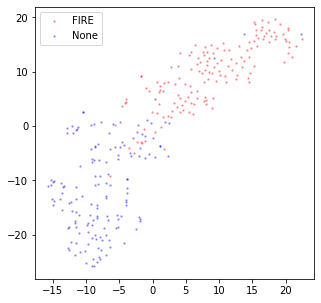

In [66]:
#plot TSNE - imbalanced data
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

# Fit and transform with a TSNE : conduct after CNN+SVM model test
tsne = TSNE(n_components=2, random_state=0)
# Project the data in 2D
X_2d = tsne.fit_transform(features_X_test_imbalanced)
# Visualize the data
target_ids = range(len(Y_test_image))

plt.figure(figsize=(5, 5))
colors =  'r', 'b'
labels =  'FIRE', 'None'
for i, c, label in zip(target_ids, colors, labels):
    plt.scatter(X_2d[Y_test_image == i, 0], X_2d[Y_test_image == i, 1], c=c, label=label, s=2 , alpha=0.3)

plt.legend()
plt.show()

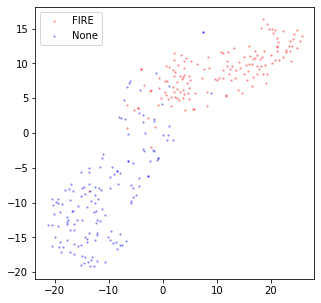

In [65]:
#plot TSNE - SMOTE data
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

# Fit and transform with a TSNE : conduct after CNN+SVM model test
tsne = TSNE(n_components=2, random_state=0)
# Project the data in 2D
X_2d = tsne.fit_transform(features_X_test_smote)
# Visualize the data
target_ids = range(len(Y_test_image))

plt.figure(figsize=(5, 5))
colors =  'r', 'b'
labels =  'FIRE', 'None'
for i, c, label in zip(target_ids, colors, labels):
    plt.scatter(X_2d[Y_test_image == i, 0], X_2d[Y_test_image == i, 1], c=c, label=label, s=2 , alpha=0.3)

plt.legend()
plt.show()

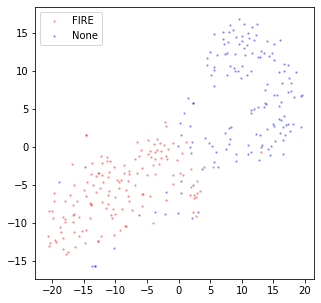

In [64]:
#plot TSNE - ADASYN data
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

# Fit and transform with a TSNE : conduct after CNN+SVM model test
tsne = TSNE(n_components=2, random_state=0)
# Project the data in 2D
X_2d = tsne.fit_transform(features_X_test_adasyn)
# Visualize the data
target_ids = range(len(Y_test_image))

plt.figure(figsize=(5, 5))
colors =  'r', 'b'
labels =  'FIRE', 'None'
for i, c, label in zip(target_ids, colors, labels):
    plt.scatter(X_2d[Y_test_image == i, 0], X_2d[Y_test_image == i, 1], c=c, label=label, s=2 , alpha=0.3)

plt.legend()
plt.show()

In [55]:
from tensorflow.keras.models import Model, load_model

model = load_model('model_imbalanced.10.h5')
test_loss, test_acc = model.evaluate(X_test_image, Y_test_image)
print(round(test_acc,5))
model = load_model('model_smote.10.h5')
test_loss, test_acc = model.evaluate(X_test_image, Y_test_image)
print(round(test_acc,5))
model = load_model('model_adasyn.10.h5')
test_loss, test_acc = model.evaluate(X_test_image, Y_test_image)
print(round(test_acc,5))

10/10 [==============================] - 0s 16ms/step - loss: 0.2998 - accuracy: 0.9000
0.9
10/10 [==============================] - 0s 16ms/step - loss: 0.2717 - accuracy: 0.9367
0.93667
10/10 [==============================] - 0s 16ms/step - loss: 0.6060 - accuracy: 0.9200
0.92
